In [1]:
#!wget https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip
#!unzip data.zip

### Model

For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

* The shape for input should be `(150, 150, 3)`
* Next, create a convolutional layer ([`Conv2D`](https://keras.io/api/layers/convolution_layers/convolution2d/)):
    * Use 32 filters
    * Kernel size should be `(3, 3)` (that's the size of the filter)
    * Use `'relu'` as activation 
* Reduce the size of the feature map with max pooling ([`MaxPooling2D`](https://keras.io/api/layers/pooling_layers/max_pooling2d/))
    * Set the pooling size to `(2, 2)`
* Turn the multi-dimensional result into vectors using a [`Flatten`](https://keras.io/api/layers/reshaping_layers/flatten/) layer
* Next, add a `Dense` layer with 64 neurons and `'relu'` activation
* Finally, create the `Dense` layer with 1 neuron - this will be the output
    * The output layer should have an activation - use the appropriate activation for the binary classification case

As optimizer use [`SGD`](https://keras.io/api/optimizers/sgd/) with the following parameters:

* `SGD(lr=0.002, momentum=0.8)`

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

2023-11-15 12:35:34.092905: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [4]:
from tensorflow.keras.preprocessing.image import load_img

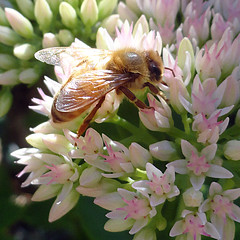

In [5]:
path = './data/train/bee'
name = '20997149292_3b5fd09795_m.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [6]:
img = load_img(fullname)
x = np.array(img)
x.shape

(240, 240, 3)

In [7]:
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### CNN Model

In [8]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

sgd_optimizer = SGD(lr=0.002, momentum=0.8)
model.compile(optimizer=sgd_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
____________________________________________

2023-11-15 12:35:39.856742: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-15 12:35:39.863028: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-15 12:35:39.863640: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-15 12:35:39.864620: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

### Question 1

Since we have a binary classification problem, what is the best loss function for us?

- mean squared error
- **binary crossentropy**
- categorical crossentropy
- cosine similarity

> **Note:** since we specify an activation for the output layer, we don't need to set `from_logits=True`

### Question 2

What's the number of parameters in the convolutional layer of our model? You can use the `summary` method for that. 

- 1 
- 65
- **896**
- 11214912

### Generators and Training

In [9]:
# Train

train_gen = ImageDataGenerator(rescale=1./255)

train_ds = train_gen.flow_from_directory(
    './data/train',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode="binary"
)

Found 3677 images belonging to 2 classes.


In [10]:
train_ds.class_indices

{'bee': 0, 'wasp': 1}

In [12]:
X, y = next(train_ds)

In [13]:
y[:5]

array([0., 1., 0., 1., 0.], dtype=float32)

In [11]:
# Test

test_gen = ImageDataGenerator(rescale=1./255)

test_ds = test_gen.flow_from_directory(
    './data/test',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode="binary"
)

Found 918 images belonging to 2 classes.


In [14]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10


2023-11-15 12:41:26.301244: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-11-15 12:41:26.915101: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-15 12:41:26.915653: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-15 12:41:26.915688: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-11-15 12:41:26.916467: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-15 12:41:26.916560: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


184/184 [==============================] - 13s 59ms/step - loss: 0.6494 - accuracy: 0.6021 - val_loss: 0.5988 - val_accuracy: 0.6612
Epoch 2/10
184/184 [==============================] - 8s 43ms/step - loss: 0.5665 - accuracy: 0.7131 - val_loss: 0.5460 - val_accuracy: 0.7135
Epoch 3/10
184/184 [==============================] - 8s 42ms/step - loss: 0.5364 - accuracy: 0.7321 - val_loss: 0.5651 - val_accuracy: 0.7135
Epoch 4/10
184/184 [==============================] - 8s 43ms/step - loss: 0.4878 - accuracy: 0.7822 - val_loss: 0.5077 - val_accuracy: 0.7603
Epoch 5/10
184/184 [==============================] - 8s 42ms/step - loss: 0.4491 - accuracy: 0.7982 - val_loss: 0.5362 - val_accuracy: 0.7407
Epoch 6/10
184/184 [==============================] - 8s 42ms/step - loss: 0.4351 - accuracy: 0.8080 - val_loss: 0.5338 - val_accuracy: 0.7375
Epoch 7/10
184/184 [==============================] - 8s 43ms/step - loss: 0.3958 - accuracy: 0.8300 - val_loss: 0.4896 - val_accuracy: 0.7723
Epoch 8/1

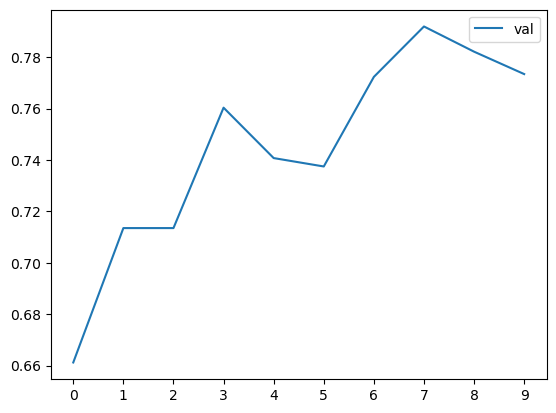

In [15]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

### Question 3

What is the median of training accuracy for all the epochs for this model?

- 0.20
- 0.40
- 0.60
- **0.80**

In [16]:
# Extracting training accuracy from history
training_accuracy = history.history['accuracy']

# Calculating the median
median_training_accuracy = np.median(training_accuracy)

print("Median Training Accuracy:", median_training_accuracy)


Median Training Accuracy: 0.8031003773212433


### Question 4

What is the standard deviation of training loss for all the epochs for this model?

- 0.031
- 0.061
- **0.091**
- 0.131

In [18]:
# Extracting training loss from history
training_loss = history.history['loss']

# Calculating the standard deviation
std_training_loss = np.std(training_loss)

print("Standard Deviation of Training Loss:", std_training_loss)

Standard Deviation of Training Loss: 0.10521202619532834


### Data Augmentation

For the next two questions, we'll generate more data using data augmentations. 

Add the following augmentations to your training data generator:

* `rotation_range=50,`
* `width_shift_range=0.1,`
* `height_shift_range=0.1,`
* `zoom_range=0.1,`
* `horizontal_flip=True,`
* `fill_mode='nearest'`

### Question 5 

Let's train our model for 10 more epochs using the same code as previously.
> **Note:** make sure you don't re-create the model - we want to continue training the model
we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?

- 0.18
- **0.48**
- 0.78
- 0.108

### Question 6

What's the average of test accuracy for the last 5 epochs (from 6 to 10)
for the model trained with augmentations?

- 0.38
- 0.58
- **0.78**
- 0.98

In [20]:
# Defining augmented data generator for training

train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [21]:
# Creating augmented data generator for training

train_generator_augmented = train_datagen_augmented.flow_from_directory(
    './data/train', 
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',  
    shuffle=True
)

Found 3677 images belonging to 2 classes.


In [23]:
history_augmented = model.fit(
    train_generator_augmented,
    epochs=10,
    validation_data=test_ds
)

Epoch 1/10
184/184 [==============================] - 22s 117ms/step - loss: 0.4917 - accuracy: 0.7694 - val_loss: 0.4673 - val_accuracy: 0.7810
Epoch 2/10
184/184 [==============================] - 22s 118ms/step - loss: 0.4886 - accuracy: 0.7716 - val_loss: 0.4797 - val_accuracy: 0.7810
Epoch 3/10
184/184 [==============================] - 22s 118ms/step - loss: 0.4797 - accuracy: 0.7803 - val_loss: 0.4995 - val_accuracy: 0.7571
Epoch 4/10
184/184 [==============================] - 22s 118ms/step - loss: 0.4775 - accuracy: 0.7773 - val_loss: 0.4850 - val_accuracy: 0.7691
Epoch 5/10
184/184 [==============================] - 22s 118ms/step - loss: 0.4764 - accuracy: 0.7884 - val_loss: 0.4527 - val_accuracy: 0.7865
Epoch 6/10
184/184 [==============================] - 22s 118ms/step - loss: 0.4659 - accuracy: 0.7822 - val_loss: 0.4433 - val_accuracy: 0.8017
Epoch 7/10
184/184 [==============================] - 22s 118ms/step - loss: 0.4613 - accuracy: 0.7974 - val_loss: 0.4473 - val_ac

In [24]:
# Extracting test loss and accuracy from history
test_loss_augmented = history_augmented.history['val_loss']
test_accuracy_augmented = history_augmented.history['val_accuracy']

# Calculating the mean of test loss for all epochs
mean_test_loss_augmented = np.mean(test_loss_augmented)

# Calculating the average of test accuracy for the last 5 epochs
average_test_accuracy_augmented = np.mean(test_accuracy_augmented[-5:])


print("Mean of Test Loss for Augmented Model:", mean_test_loss_augmented)
print("Average of Test Accuracy (Last 5 Epochs) for Augmented Model:", average_test_accuracy_augmented)


Mean of Test Loss for Augmented Model: 0.47820180654525757
Average of Test Accuracy (Last 5 Epochs) for Augmented Model: 0.7840958595275879
